# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#create different lists for finding proper values from API call
lat=[]
lon=[]
temp_max=[]
humidity=[]
wind=[]
country=[]
city_id=[]
city_name=[]
cloudiness=[]
dat=[]

#Create string for API call for all of cities found from citipy
url=f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"
counter=1
print("Beginning Data Retrieval")
print("-----------------------------")
for c in cities:
    query_url=f"{url}&q={c}"
    response=requests.get(query_url).json()
    #consider successful API call
    if (response["cod"]==200):
        print(f"Processing Record {counter} of set 1 | {c}")
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        dat.append(response["dt"])
        city_id.append(counter)
        counter+=1
    else:
        print(f"{c} NOT FOUND. Skipping.... !!!!")
    time.sleep(4)
print("--------------------------------------------------")
print("Data Retrieval Complete")
print(f"Successful API call for {counter-1} cities")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | georgetown
Processing Record 2 of set 1 | clyde river
Processing Record 3 of set 1 | east london
Processing Record 4 of set 1 | ribeira grande
Processing Record 5 of set 1 | saint-paul
visimo-utkinsk NOT FOUND. Skipping.... !!!!
Processing Record 6 of set 1 | rikitea
higuey NOT FOUND. Skipping.... !!!!
Processing Record 7 of set 1 | uvalde
Processing Record 8 of set 1 | muros
Processing Record 9 of set 1 | berlevag
Processing Record 10 of set 1 | ostwald
Processing Record 11 of set 1 | ganzhou
Processing Record 12 of set 1 | mount isa
Processing Record 13 of set 1 | norman wells
Processing Record 14 of set 1 | avarua
Processing Record 15 of set 1 | le vauclin
Processing Record 16 of set 1 | kavaratti
Processing Record 17 of set 1 | kochubey
paucartambo NOT FOUND. Skipping.... !!!!
saleaula NOT FOUND. Skipping.... !!!!
Processing Record 18 of set 1 | castro
Processing Record 19 of set 1 | niquelandia
P

Processing Record 178 of set 1 | selikhino
louisbourg NOT FOUND. Skipping.... !!!!
Processing Record 179 of set 1 | mpanda
sentyabrskiy NOT FOUND. Skipping.... !!!!
Processing Record 180 of set 1 | uitenhage
Processing Record 181 of set 1 | kodiak
Processing Record 182 of set 1 | nuuk
Processing Record 183 of set 1 | fukue
Processing Record 184 of set 1 | baruun-urt
Processing Record 185 of set 1 | san policarpo
Processing Record 186 of set 1 | baragua
Processing Record 187 of set 1 | yulara
Processing Record 188 of set 1 | pucara
Processing Record 189 of set 1 | tuktoyaktuk
Processing Record 190 of set 1 | avera
Processing Record 191 of set 1 | viedma
Processing Record 192 of set 1 | derzhavinsk
duz NOT FOUND. Skipping.... !!!!
Processing Record 193 of set 1 | tommot
haibowan NOT FOUND. Skipping.... !!!!
Processing Record 194 of set 1 | teeli
Processing Record 195 of set 1 | fort collins
Processing Record 196 of set 1 | mitsamiouli
Processing Record 197 of set 1 | porangatu
Processing

Processing Record 355 of set 1 | uyuni
dzhusaly NOT FOUND. Skipping.... !!!!
Processing Record 356 of set 1 | kainantu
Processing Record 357 of set 1 | comodoro rivadavia
Processing Record 358 of set 1 | onguday
Processing Record 359 of set 1 | pacifica
Processing Record 360 of set 1 | bungu
Processing Record 361 of set 1 | verkhnevilyuysk
Processing Record 362 of set 1 | murdochville
Processing Record 363 of set 1 | launceston
Processing Record 364 of set 1 | daimiel
Processing Record 365 of set 1 | oistins
Processing Record 366 of set 1 | kieta
Processing Record 367 of set 1 | carman
Processing Record 368 of set 1 | papanasam
Processing Record 369 of set 1 | nanpiao
Processing Record 370 of set 1 | ansbach
Processing Record 371 of set 1 | limbang
Processing Record 372 of set 1 | porto novo
Processing Record 373 of set 1 | oliveira dos brejinhos
Processing Record 374 of set 1 | vestmannaeyjar
Processing Record 375 of set 1 | margate
Processing Record 376 of set 1 | narsaq
Processing R

Processing Record 536 of set 1 | zemio
Processing Record 537 of set 1 | xichang
Processing Record 538 of set 1 | porto franco
Processing Record 539 of set 1 | playas
Processing Record 540 of set 1 | sibu
Processing Record 541 of set 1 | nosy varika
Processing Record 542 of set 1 | palaikastron
Processing Record 543 of set 1 | deputatskiy
Processing Record 544 of set 1 | shahdadkot
Processing Record 545 of set 1 | fortuna
Processing Record 546 of set 1 | villaviciosa
Processing Record 547 of set 1 | talnakh
Processing Record 548 of set 1 | alamos
Processing Record 549 of set 1 | morococha
Processing Record 550 of set 1 | sena madureira
meyungs NOT FOUND. Skipping.... !!!!
Processing Record 551 of set 1 | taguatinga
--------------------------------------------------
Data Retrieval Complete
Successful API call for 551 cities


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create Data Frame and show number of rows
weather_data=pd.DataFrame({"Id":city_id, "City":city_name, "Lat":lat, "Lng":lon, "Max Temp":temp_max,
    "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":wind, "Country":country, "Date":dat})
print(weather_data.count())

Id            551
City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64


In [7]:
#Convert Data frame to csv file and show data frame
weather_data.to_csv(output_data_file,encoding='utf_8',index=False)
weather_data.head()

,Id,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,George Town,5.41,100.34,78.80,78,20,3.36,MY,1609451138
1,2,Clyde River,70.47,-68.59,-4.00,83,90,9.17,CA,1609451142
2,3,East London,-33.02,27.91,69.33,79,74,15.26,ZA,1609451146
3,4,Ribeira Grande,38.52,-28.70,59.00,87,75,19.46,PT,1609451150
4,5,Saint-Paul,-21.01,55.27,73.40,83,20,13.87,RE,1609451155


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#find maximum of humidity and create new data frame from it and claculate related statistics
max=weather_data["Humidity"].max()
print(f"Maximum of humidity in data frame is: {max}")
if max>100:
    clean_data=weather_data.loc[weather_data["Humidity"]<= 100]
    clean_data.describe()
weather_data.describe()

Maximum of humidity in data frame is: 100


,Id,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,276.000000,20.623158,13.716860,48.632577,76.268603,56.021779,8.125281,1.609452e+09
std,159.204271,33.480731,92.530267,31.811787,16.958036,39.802415,5.942378,7.339687e+02
min,1.000000,-54.800000,-179.170000,-42.120000,17.000000,0.000000,0.130000,1.609451e+09
25%,138.500000,-6.360000,-68.405000,31.325000,69.000000,10.500000,3.360000,1.609452e+09
50%,276.000000,26.330000,17.940000,59.000000,80.000000,75.000000,6.930000,1.609452e+09
75%,413.500000,49.495000,101.300000,75.200000,88.000000,94.000000,11.410000,1.609453e+09
max,551.000000,78.220000,179.320000,91.400000,100.000000,100.000000,42.500000,1.609454e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.
wrong_data=weather_data.loc[weather_data["Humidity"]>100]
indices=[]
indices=wrong_data["Id"].index
indices

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data.drop(indices, inplace=False)

In [18]:
clean_city_data["Id"].count()
clean_city_data


,Id,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,George Town,5.41,100.34,78.80,78,20,3.36,MY,1609451138
1,2,Clyde River,70.47,-68.59,-4.00,83,90,9.17,CA,1609451142
2,3,East London,-33.02,27.91,69.33,79,74,15.26,ZA,1609451146
3,4,Ribeira Grande,38.52,-28.70,59.00,87,75,19.46,PT,1609451150
4,5,Saint-Paul,-21.01,55.27,73.40,83,20,13.87,RE,1609451155
...,...,...,...,...,...,...,...,...,...,...
546,547,Talnakh,69.49,88.40,-13.00,62,0,2.24,RU,1609453567
547,548,Álamos,27.02,-108.93,70.00,38,0,3.00,MX,1609453650
548,549,Morococha,-11.60,-76.14,35.26,96,100,3.29,PE,1609453655
549,550,Sena Madureira,-9.07,-68.66,80.55,92,97,1.57,BR,1609453659


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

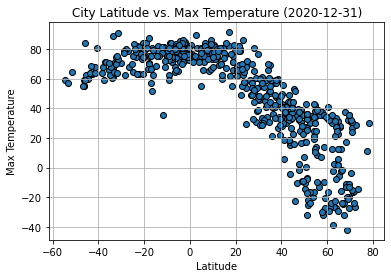

In [49]:
ax = plt.subplots()
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], edgecolors="black")
t=f"City Latitude vs. Max Temperature ({date.today()})"
plt.title(t)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

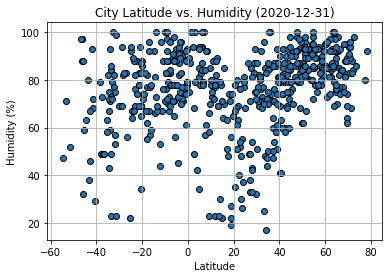

In [51]:
ax = plt.subplots()
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolors="black")
t=f"City Latitude vs. Humidity ({date.today()})"
plt.title(t)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

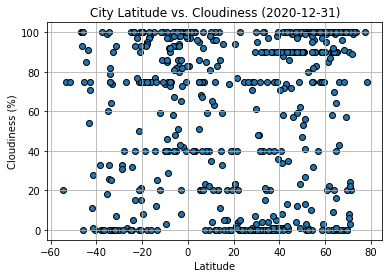

In [52]:
ax = plt.subplots()
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolors="black")
t=f"City Latitude vs. Cloudiness ({date.today()})"
plt.title(t)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

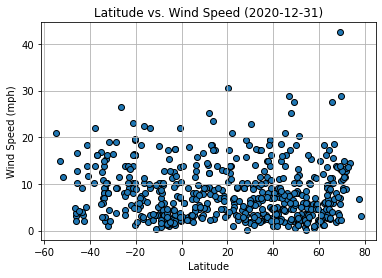

In [53]:
ax = plt.subplots()
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolors="black")
t=f"Latitude vs. Wind Speed ({date.today()})"
plt.title(t)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Lat_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [112]:
def linear_reg(x, y, y_label, filen,xy):
    slope, intercept, r_value, p_value, std_err=st.linregress(x,y)
    regression_value=x*slope+intercept
    plt.scatter(x, y)
    plt.plot(x, regression_value, color='red')
    line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    plt.annotate(line_eq, xy, color='red', fontsize=14)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value}")
    path="output_data/"+filen
    plt.savefig(path)
    plt.show()
        
northern_hemisphere=clean_city_data.loc[clean_city_data["Lat"]> 0]
southern_hemisphere=clean_city_data.loc[clean_city_data["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8224275043657755


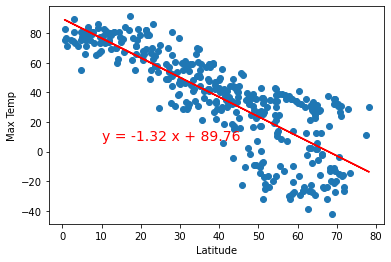

In [125]:
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], "Max Temp", "Linear_Lat_vs_Temp_north_Hemispher.png",(10,8))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.49931696271207027


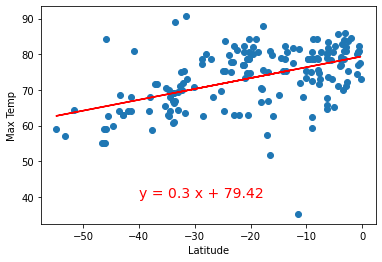

In [137]:
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], "Max Temp", "Linear_Lat_vs_Temp_south_Hemispher.png",(-40,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.37817200342916135


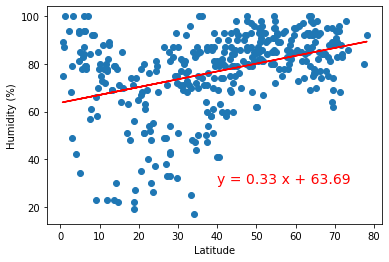

In [147]:
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], "Humidity (%)", "Linear_Lat_vs_Humidity_north_Hemispher.png",(40,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31175167230298634


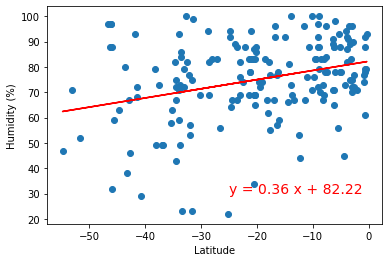

In [154]:
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], "Humidity (%)", "Linear_Lat_vs_Humidity_south_Hemispher.png",(-25,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22003905987782213


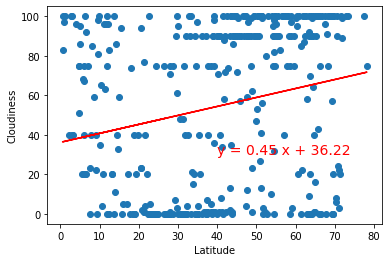

In [155]:
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], "Cloudiness (%)", "Linear_Lat_vs_Cloudiness_north_Hemispher.png",(40,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2888753686367975


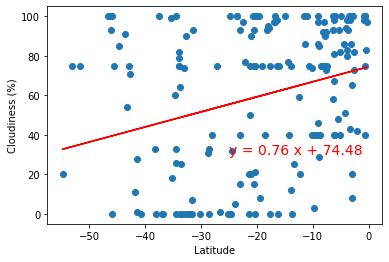

In [156]:
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], "Cloudiness (%)", "Linear_Lat_vs_Cloudiness_south_Hemispher.png",(-25,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0021807537637835907


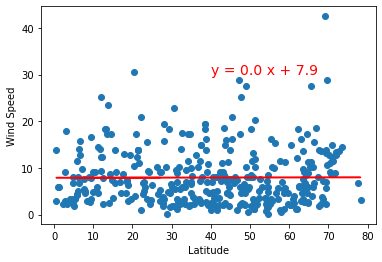

In [158]:
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], "Wind Speed", "Linear_Lat_vs_Wind_north_Hemispher.png",(40,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


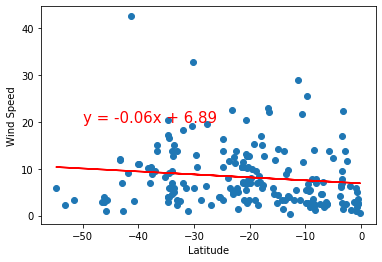

In [32]:
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], "Cloudiness (%)", "Linear_Lat_vs_Wind_south_Hemispher.png",(-25,30))